In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import statsmodels.api as sm

In [24]:
df = pd.read_csv('2015.csv')
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [25]:
df.set_index('Country', inplace=True)  # Set 'Country' column as the index
df.drop(columns=['Region', 'Happiness Rank'], inplace=True)
df.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [26]:
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df)
#moyenne
print(np.mean(Z,axis=0))
#écart-type
print(np.std(Z,axis=0))

[ 9.89363303e-16 -1.01184883e-16 -2.24855296e-16 -2.24855296e-16
 -2.24855296e-16  4.49710592e-17  6.74565888e-17  2.69826355e-16
 -1.34913178e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

9


[3.82916182e+00 1.43780968e+00 1.18679430e+00 8.52916032e-01
 7.07604900e-01 5.08086504e-01 3.86814423e-01 1.48137138e-01
 3.88675466e-08]


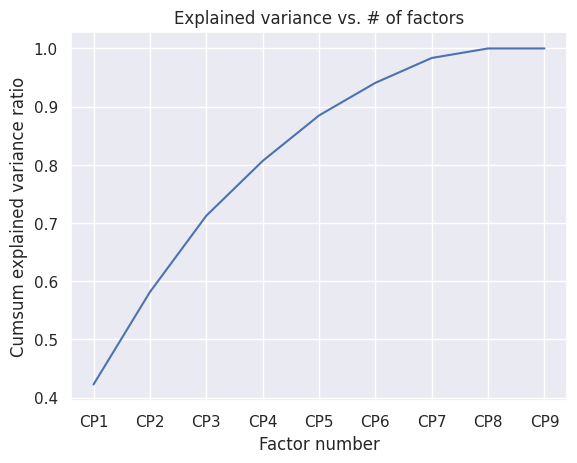

array([4.22769625e-01, 1.58745513e-01, 1.31031438e-01, 9.41686477e-02,
       7.81251543e-02, 5.60967519e-02, 4.27073590e-02, 1.63555068e-02,
       4.29128328e-09])

In [31]:
print(acp.explained_variance_)

#cumul de variance expliquée
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8","CP9"]
plt.plot(list_acp,np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
acp.explained_variance_ratio_

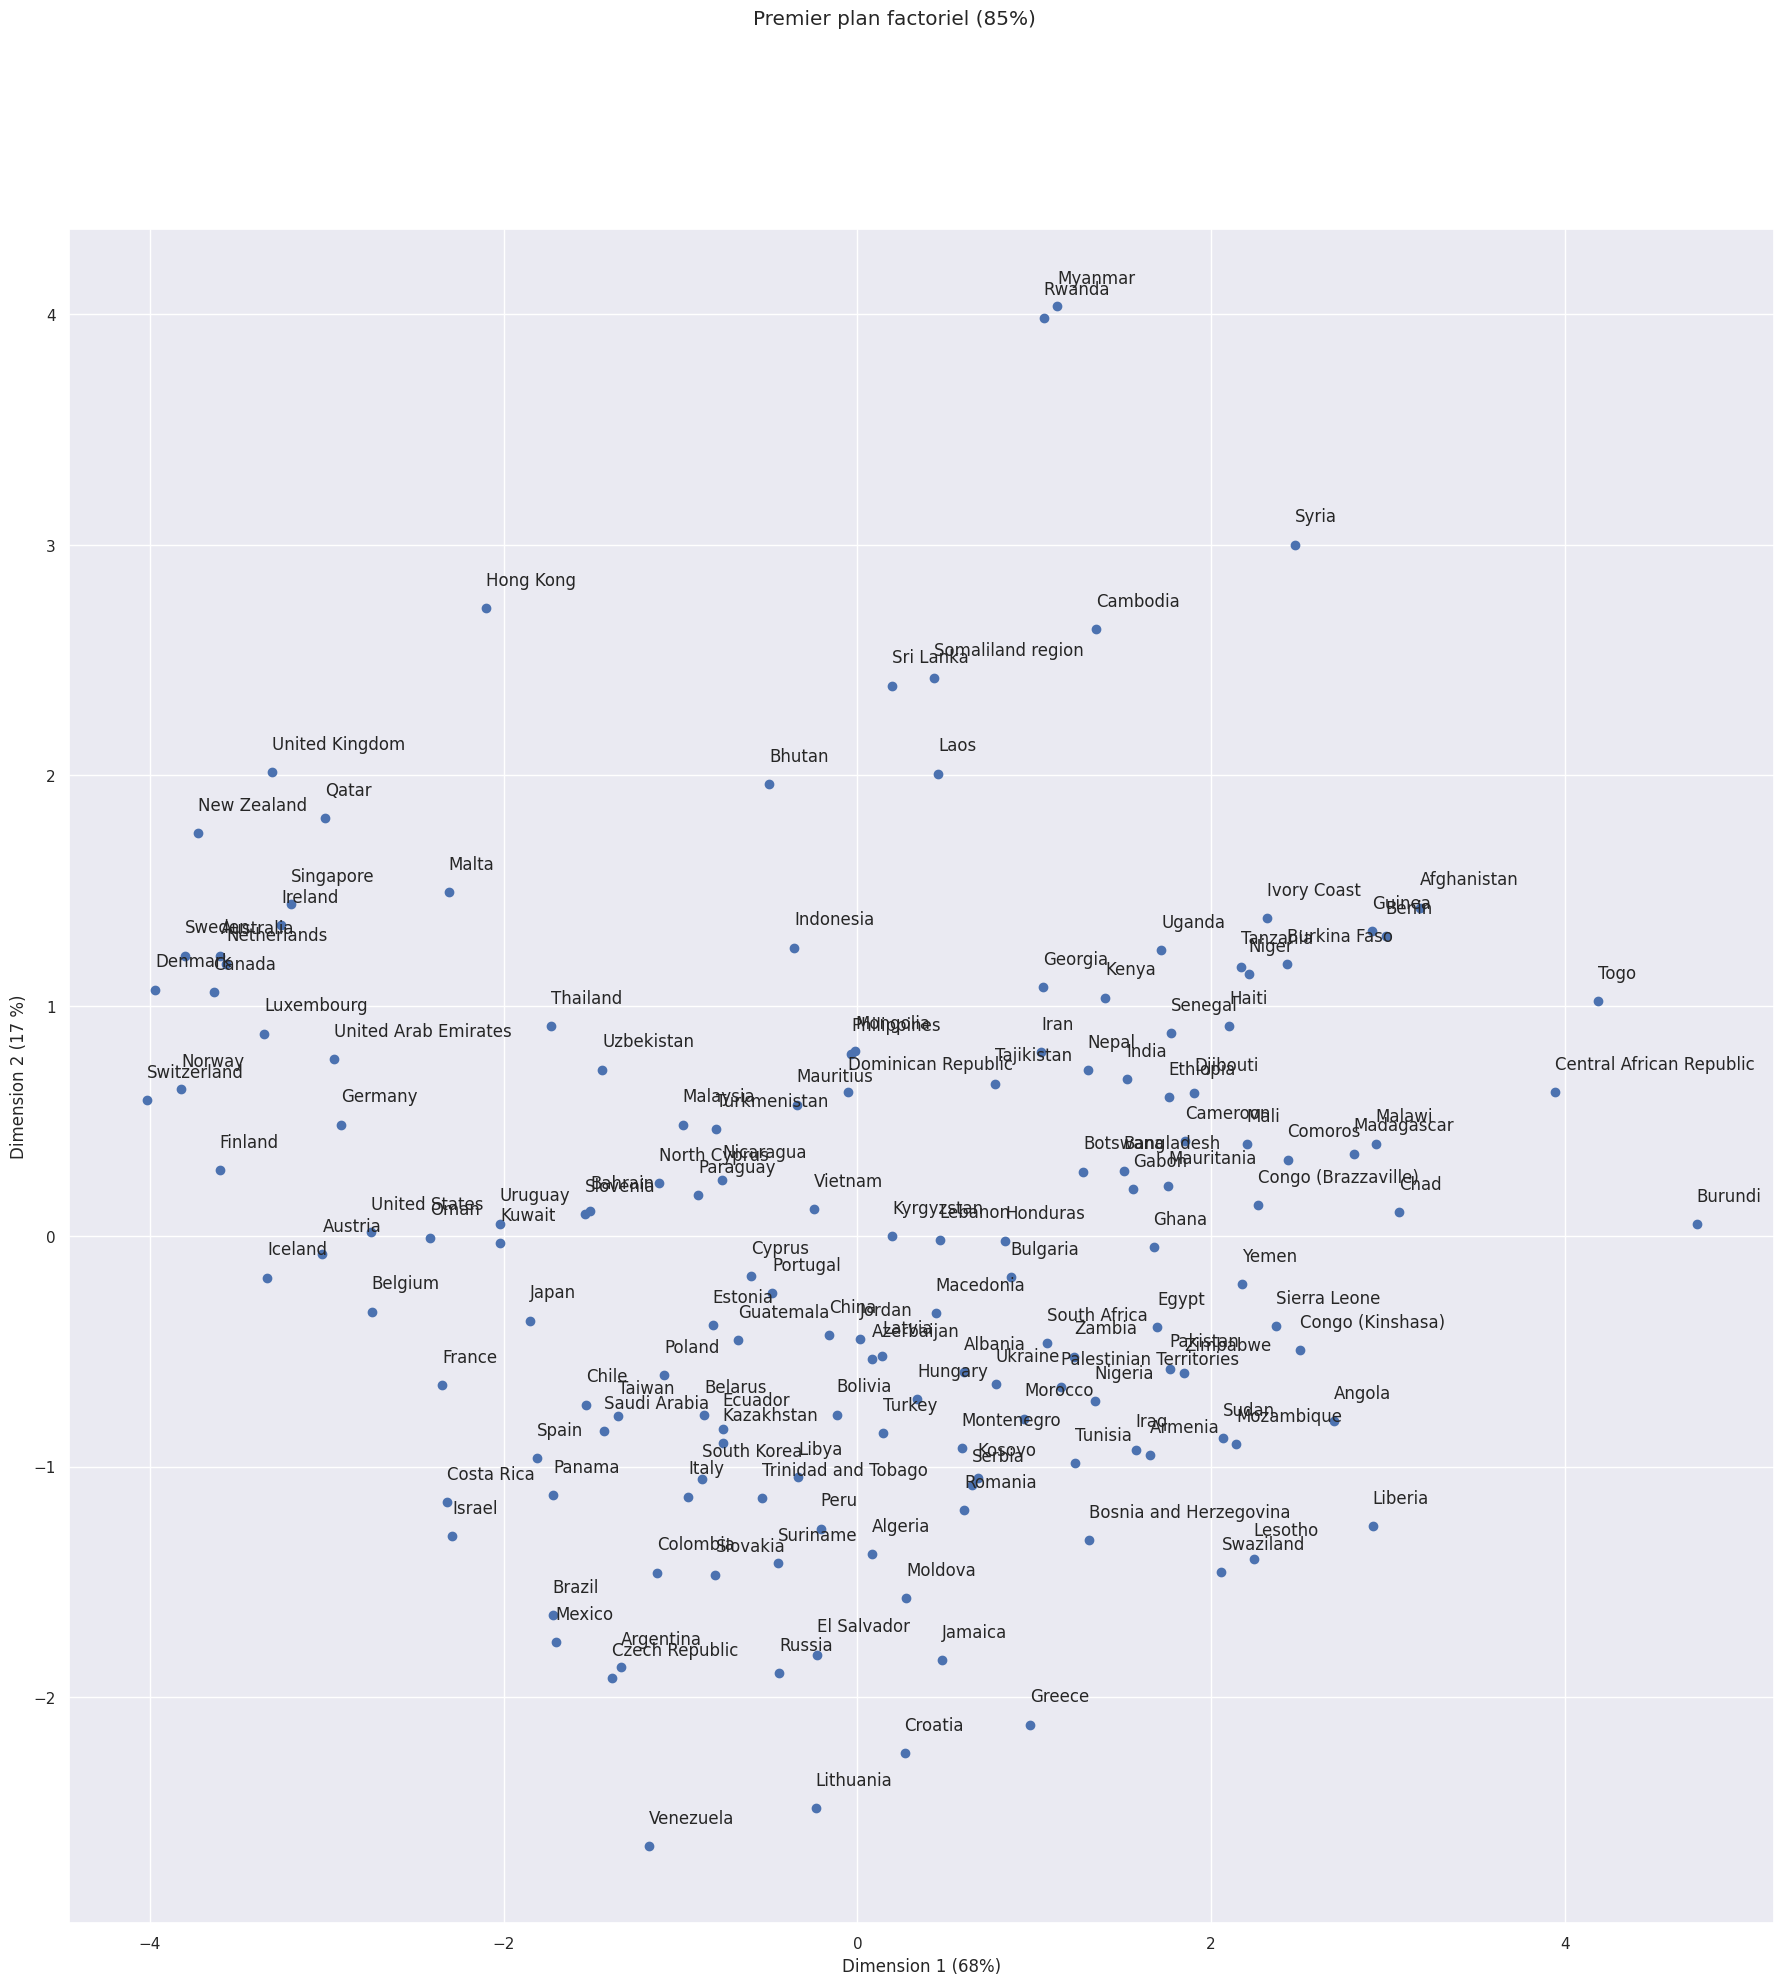

In [36]:
plt.figure(figsize=(22, 22))
plt.scatter(coord[:,0],coord[:,1])
# Loop for annotation of all points
for i in range(len(coord)):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1] + 0.1))
plt.xlabel("Dimension 1 (68%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (17 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (85%)") # titre général
plt.show()